In [145]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go

path = '/Users/nikita.andrianov/Desktop/Fontys/Data Science/'

wage = pd.read_csv(path + '/avg_wage.csv',encoding='latin1',dtype='unicode')
housing = pd.read_csv(path + '/housing_prices.csv',encoding='latin1',dtype='unicode')

wage.rename(columns = {'ï»¿"COUNTRY"':'Country_Code','Value':'Average annual wage'},inplace=True)
housing.rename(columns = {'ï»¿"LOCATION"':'Country_Code','Value':'Housing price index'},inplace=True)


In [146]:
NetherlandsWageOver19Years = wage.loc[wage['Country'].isin(['Netherlands'])]
wageNetherlands = NetherlandsWageOver19Years.loc[NetherlandsWageOver19Years['Series'].isin(['Current prices in NCU'])]

In [147]:
wageNetherlands.head(3)

,Country_Code,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Average annual wage,Flag Codes,Flags
304,NLD,Netherlands,CPNCU,Current prices in NCU,2000,2000,EUR,Euro,0,Units,NaN,NaN,32049.2919574717,NaN,NaN
305,NLD,Netherlands,CPNCU,Current prices in NCU,2001,2001,EUR,Euro,0,Units,NaN,NaN,33570.6262963926,NaN,NaN
306,NLD,Netherlands,CPNCU,Current prices in NCU,2002,2002,EUR,Euro,0,Units,NaN,NaN,34828.7656246271,NaN,NaN


In [148]:
housingNetherlands = housing.loc[housing['Country_Code'].isin(['NLD'])]
housingNetherlands.head(3)

,Country_Code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Housing price index,Flag Codes
328,NLD,HOUSECOST,NOMINAL,IDX2015,A,2000,80.0434221493274,NaN
329,NLD,HOUSECOST,NOMINAL,IDX2015,A,2001,88.9204451489599,NaN
330,NLD,HOUSECOST,NOMINAL,IDX2015,A,2002,94.6351801939706,NaN


In [149]:
#Merging 
wageDF = pd.merge(wageNetherlands, housingNetherlands[['Housing price index','TIME']], how='inner', on = 'TIME') 

In [150]:
wageDF.head(3)

,Country_Code,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Average annual wage,Flag Codes,Flags,Housing price index
0,NLD,Netherlands,CPNCU,Current prices in NCU,2000,2000,EUR,Euro,0,Units,NaN,NaN,32049.2919574717,NaN,NaN,80.0434221493274
1,NLD,Netherlands,CPNCU,Current prices in NCU,2001,2001,EUR,Euro,0,Units,NaN,NaN,33570.6262963926,NaN,NaN,88.9204451489599
2,NLD,Netherlands,CPNCU,Current prices in NCU,2002,2002,EUR,Euro,0,Units,NaN,NaN,34828.7656246271,NaN,NaN,94.6351801939706


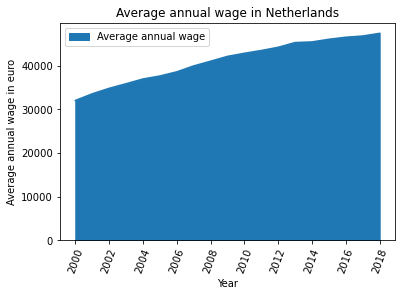

In [166]:
wageDF['Average annual wage'] = pd.to_numeric(wageDF['Average annual wage'])
ax = plt.gca()
plt.xticks(np.arange(0, 19, step=2))
plot = wageDF.plot(kind='area',x='Time',y='Average annual wage',ax=ax,rot=70,title='Average annual wage in Netherlands')
ax.set_ylabel("Average annual wage in euro")
ax.set_xlabel("Year")
fig = plot.get_figure()
fig.savefig("Average annual wage Netherlands")


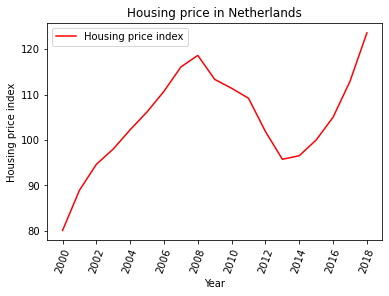

In [168]:
wageDF['Housing price index'] = pd.to_numeric(wageDF['Housing price index'])
ax = plt.gca()
plt.xticks(np.arange(0, 19, step=2))
plot = wageDF.plot(kind='line',x='Time',y='Housing price index',ax=ax,rot=70, title='Housing price in Netherlands',color = 'red')
ax.set_xlabel("Year")
ax.set_ylabel("Housing price index")
fig = plot.get_figure()
fig.savefig('Housing price in Netherlands')

In [171]:
#Wage comparing with Neightbours plot
a = wage.loc[wage['Series'].isin(['Current prices in NCU'])]
NeightboursWage = a.loc[a['Country'].isin(['Netherlands','Belgium','Germany','France','Austria'])]
NeightboursWageEuro =  NeightboursWage.loc[NeightboursWage['Unit'].isin(['Euro'])]
NeightboursWage2018 = NeightboursWageEuro.loc[NeightboursWageEuro['Time'].isin(['2018'])]
NeightboursWage2018

,Country_Code,Country,SERIES,Series,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Average annual wage,Flag Codes,Flags
37,AUT,Austria,CPNCU,Current prices in NCU,2018,2018,EUR,Euro,0,Units,NaN,NaN,43468.0353144241,NaN,NaN
56,BEL,Belgium,CPNCU,Current prices in NCU,2018,2018,EUR,Euro,0,Units,NaN,NaN,45097.1450470925,NaN,NaN
151,FRA,France,CPNCU,Current prices in NCU,2018,2018,EUR,Euro,0,Units,NaN,NaN,38288.9073514499,NaN,NaN
170,DEU,Germany,CPNCU,Current prices in NCU,2018,2018,EUR,Euro,0,Units,NaN,NaN,40521.6435277759,NaN,NaN
322,NLD,Netherlands,CPNCU,Current prices in NCU,2018,2018,EUR,Euro,0,Units,NaN,NaN,47422.4857281207,NaN,NaN


<ipython-input-172-0cd0b8dfff33>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



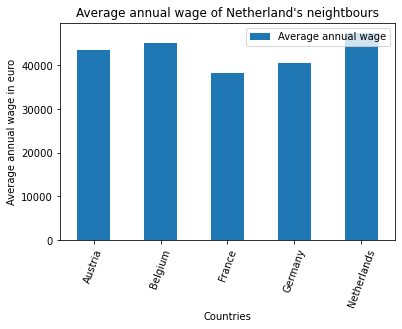

In [172]:
ax = plt.gca()
NeightboursWage2018['Average annual wage'] = pd.to_numeric(NeightboursWage2018['Average annual wage'])
NeightboursWage2018.plot.bar(ax=ax, x="Country", y="Average annual wage", rot=70, title="Average annual wage of Netherland's neightbours")
ax.set_ylabel("Average annual wage in euro")
ax.set_xlabel("Countries")
fig = plot.get_figure()
fig.savefig('Average annual wage of Netherland neightbours')

In [175]:
housing2018 = housing.loc[housing['TIME'].isin(['2018'])]
housing2018Neighbours = housing2018.loc[housing2018['Country_Code'].isin(['NLD','FRA','DEU','BEL','AUS'])]
housing2018Neighbours
#Merging 
housingDF = pd.merge(housing2018,NeightboursWage2018 [['Country','Country_Code']], how='inner', on = 'Country_Code') 
housingDF

,Country_Code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Housing price index,Flag Codes,Country
0,AUT,HOUSECOST,NOMINAL,IDX2015,A,2018,119.64,NaN,Austria
1,BEL,HOUSECOST,NOMINAL,IDX2015,A,2018,109.415295958587,NaN,Belgium
2,FRA,HOUSECOST,NOMINAL,IDX2015,A,2018,107.15,NaN,France
3,DEU,HOUSECOST,NOMINAL,IDX2015,A,2018,121.680420105026,NaN,Germany
4,NLD,HOUSECOST,NOMINAL,IDX2015,A,2018,123.61,NaN,Netherlands


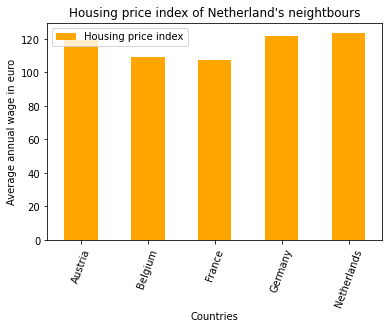

In [176]:
housingDF['Housing price index'] = pd.to_numeric(housingDF['Housing price index'])
ax = plt.gca()
plot = housingDF.plot.bar(ax=ax, x="Country", y="Housing price index", rot=70, title="Housing price index of Netherland's neightbours",color='orange')
ax.set_ylabel("Average annual wage in euro")
ax.set_xlabel("Countries")
fig = plot.get_figure()
fig.savefig('Housing price of Netherland neightbours')

In [180]:
#Environmental impact of cities
co2emission = pd.read_csv(path + '/co2.csv',encoding='latin1',dtype='unicode',skiprows=3)


fig = go.Figure(data=go.Choropleth(
    locations = co2emission['Country Code'],
    z = co2emission['2014'],
    text = co2emission['Country Name'],
    colorscale = 'dense',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_title = 'CO2 emissions kt',
    
))

fig.update_layout(
    title_text='CO2 emissions worldwide 2014',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()
fig.write_image("CO2 emissions")

ValueError: 
Cannot infer image type from output path 'CO2 emissions'.
Please add a file extension or specify the type using the format parameter.
For example:

    >>> import plotly.io as pio
    >>> pio.write_image(fig, file_path, format='png')


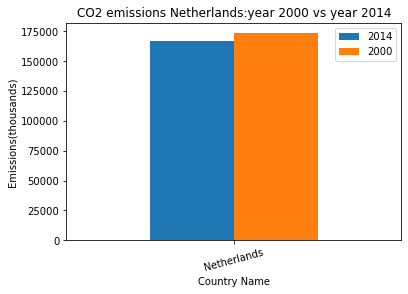

In [143]:
co2emission = co2emission.loc[co2emission['Country Name'].isin(['Netherlands'])]
co2emission['2014']=pd.to_numeric(co2emission['2014'])
co2emission['2000']=pd.to_numeric(co2emission['2000'])
comparison = co2emission[['2014', '2000']] 
index = co2emission['Country Name']
dataFrame  = pd.DataFrame(data = comparison)
dataFrame.index = index
ax = plt.gca()
dataFrame.plot.bar(ax = ax,rot=15, title="CO2 emissions Netherlands:year 2000 vs year 2014");
ax.set_ylabel("Emissions(thousands)")
plt.show(block=True);

In [130]:
#How netherlands adapt to the climate change
adaptation = pd.read_csv(path + '/Adaptation.csv',encoding='latin1',dtype='unicode')
adaptationNetherlands = adaptation.loc[adaptation['Country'].isin(['Netherlands'])]
adaptationNetherlands

,Account number,Organization,City,Country,Region,C40,Access,Reporting Year,Climate hazards,Adaptation Action,Action description,City Location,Country Location
9,31179,Gemeente Rotterdam,Rotterdam,Netherlands,Europe,C40,Public,2017,Storm surge,Additional reservoirs and wells for water storage,For all actions See: Rotterdam Climate Change ...,"(51.9163716, 4.4509382)","(52.132633, 5.291266)"
10,31179,Gemeente Rotterdam,Rotterdam,Netherlands,Europe,C40,Public,2017,Drought,Additional reservoirs and wells for water storage,For all actions See: Rotterdam Climate Change ...,"(51.9163716, 4.4509382)","(52.132633, 5.291266)"
11,31179,Gemeente Rotterdam,Rotterdam,Netherlands,Europe,C40,Public,2017,Salt water intrusion,Additional reservoirs and wells for water storage,For all actions See: Rotterdam Climate Change ...,"(51.9163716, 4.4509382)","(52.132633, 5.291266)"
12,31179,Gemeente Rotterdam,Rotterdam,Netherlands,Europe,C40,Public,2017,Rain storm,Additional reservoirs and wells for water storage,For all actions See: Rotterdam Climate Change ...,"(51.9163716, 4.4509382)","(52.132633, 5.291266)"
13,31179,Gemeente Rotterdam,Rotterdam,Netherlands,Europe,C40,Public,2017,Subsidence,Additional reservoirs and wells for water storage,For all actions See: Rotterdam Climate Change ...,"(51.9163716, 4.4509382)","(52.132633, 5.291266)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,31148,City of Amsterdam,Amsterdam,Netherlands,Europe,C40,Public,2017,River flood,NaN,For each subject we have undertaken several ac...,"(52.370216, 4.895168)","(52.132633, 5.291266)"
2180,43930,The Hague,The Hague,Netherlands,Europe,NaN,Public,2017,Groundwater flood,NaN,NaN,"(52.070498, 4.3007)","(52.132633, 5.291266)"
2188,54478,Gemeente Nijmegen,Nijmegen,Netherlands,Europe,NaN,Public,2017,Drought,NaN,NaN,"(51.844884, 5.842828)","(52.132633, 5.291266)"
2207,43930,The Hague,The Hague,Netherlands,Europe,NaN,Public,2017,Coastal flood,NaN,NaN,"(52.070498, 4.3007)","(52.132633, 5.291266)"
